In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [59]:
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)
%matplotlib inline

In [60]:
np.random.seed(42)

# Задание 1

Начнём с простого - создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

У дерева должны быть следующие параметры:
максимальная глубина - 5 уровней
минимальное число образцов в вершине для разделения - 5

Подробнее узнать об имеющихся параметрах Decision Tree можно узнать в документации.

In [61]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Получил Поскалку))
Отличный вариант решения, а тут и вторая пасхалочка!
https://stepik.org/invitation/28197afd3258d206bbb410fe79e36bcf4678e1b7/

# Вопрос 1
Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.
Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.
В ответе необходимо указать число с точностью 3 знака после запятой.

In [62]:
df = pd.read_csv('data/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [63]:
X = df[['sex', 'exang']]
y = df.num
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

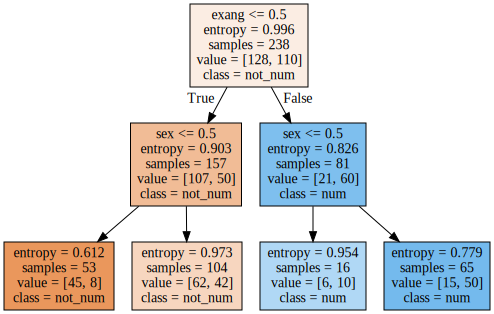

In [64]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
                                    class_names=['not_num', 'num'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [65]:
# IG = 0.996 - (n0*E0 + n1*E1)/N
# n0 - чило сэмплов слева, n1 - число сэмплов справа, E0 - энтропия слева, Е1 - энтропия справа. N = n0+n1
ig = 0.996 - (157*0.903 + 81*0.826)/(157 + 81)
ig

0.11920588235294105

In [66]:
# в pic/ig.png лежат формулы полезные для этого урпжанения.

Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [67]:
iris = pd.read_csv('data/iris.csv', index_col=0)
iris.columns = iris.columns.str.replace(' ', '_')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [69]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [70]:
y.dtypes

species    int64
dtype: object

In [71]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
predicted = dt.predict(X_test)
predicted

array([1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0], dtype=int64)

# Задание на сопоставление значений из двух списков

cross_validate - Разделение данных на k частей, тренировка на k−1 частях, тестирование на оставшейся; так для каждой части
train_test_split - Разделение имеющихся данных на тестовый и тренировочный наборы
LeaveOneOut - Разделение данных на 2 части с n−1 и 1 наблюдением, на первой идёт тренировка, 2-ая - для предсказания; каждое наблюдение побывает во второй части
ShuffleSplit - Аналог обычного разделения на тестовый и тренировочный датасэты с большим числом таких случайных разделений
LeavePOut - Разделение данных на 2 части с n−k и k наблюдениями, на первой идёт тренировка, 2-ая - для предсказания; идёт ротация по всем наблюдениям
StratifiedKFold - k-fold cross validation с учётом количества наблюдений в классах

# Расположите элементы списка в правильном порядке

В продолжение предыдущего вопроса - расположите разные стратегии разделения данных для кросс-валидации по затратам вычислительных мощностей на последующие предсказания. Сверху самый быстрый и требующий меньше всего вычислений для валидации:

1 split on train and test sets
2 k-fold cross validation
3 leave one out

Правильно! Такой порядок связан с количеством последующих прогонов через модель: в обычном сплите получается всего 1 пара train и test datasets, в k-fold кросс-валидации их будет уже k, а в leave-one-out - по числу наблюдений.

# шаг 8

Существуют различные способы вызова кросс-валидации в sklearn, например

cross_val_predict(estimator, x, y, cv=bar)
где estimator - предсказывающая модель, а bar - число блоков при k-fold кросс-валидации или объект из sklearn.model_selection, позволяющий осуществлять кросс-валидацию по другой стратегии.
Мы будем использовать другой способ - GridSearchCV, отбирающий лучшую модель по заданным параметрам, проводя кросс-валидацию.

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [73]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'cv': range(1, 10)}

In [74]:
best_tree = tree.DecisionTreeClassifier()
search = GridSearchCV(best_tree, parameters)
search.fit(X, y)
search.best_estimator_

ValueError: Invalid parameter cv for estimator DecisionTreeClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

### Чужие решения

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Инициализация Дерева
dt = DecisionTreeClassifier()

# Словарь параметров для Дерева и их диапазоном значений
dt_params = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}

# Обучение Дерева с перебором значений параметров
search = GridSearchCV(dt, param_grid=dt_params, cv=5)
search.fit(X, y)

# Дерево с лучшим сочетаением параметров
best_tree = search.best_estimator_

# Шаг 9

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
params = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 10)}

In [81]:
dt = tree.DecisionTreeClassifier()
search = RandomizedSearchCV(dt, params)
search.fit(X, y)
best_tree = search.best_estimator_

In [82]:
best_tree

DecisionTreeClassifier(max_depth=6, min_samples_split=5)

# Шаг 10
Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

    train - размеченный с известными правильным ответами (хранятся в колонке y)
    test - набор, где нужно предсказать их
Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

    максимальная глубина - от 1 до 10 уровней
    минимальное число проб для разделения - от 2 до 10
    минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [86]:
# эксперименты над уже подгруженными данными, чтобы безошибочно решить с предложенными в задании.
train = iris
X = train.drop('species', axis='columns')
y = train.species
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
# моё решение
X = train.drop('y', axis='columns')
y = train.y
params = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 10)}
dt = tree.DecisionTreeClassifier()
search = GridSearchCV(dt, params)
search.fit(X, y)
predictions = search.predict(test)
best_tree = search.best_estimator_

In [ ]:
# лучшее решение

#processing parameters
X = train.drop('y', axis='columns')
y = train.y

params = {'max_depth': range(1, 11),
          'min_samples_split': range(2, 11),
          'min_samples_leaf': range(1, 10)}

#model preprocessing
dt = tree.DecisionTreeClassifier()
search = GridSearchCV(dt, params)

#model learning
search.fit(X, y)
best_tree = search.best_estimator_

#model prediction
predictions = best_tree.predict(test)

## Чужие решения

In [82]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# разбиваем датафрейм train на X и y
x_train = train.drop(["y"], axis=1)
y_train = train["y"]

# создаем словарь с параметрами, которые хотим проверить
params = {"max_depth": range(1,11), "min_samples_split":range(2,11), "min_samples_leaf":range(1,11)}

# создаем экзмпляр дерева
dt = DecisionTreeClassifier()

# создаем экземпляр GridSearchCV
search = GridSearchCV(dt, params, cv=5)

# обучаем или ищем лучшее дерево
search.fit(x_train,y_train)

# сохраням лучшее дерево по мнению GridSearchCV
best_tree = search.best_estimator_

# делаем предсказания по лучшему дереву на датасете test
predictions = best_tree.predict(test)

In [ ]:
# Тут интересный drop.

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = train.drop(columns='y')
y = train['y']

clf = tree.DecisionTreeClassifier()
clf
parametrs = {'max_depth': range(1, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)}
search = GridSearchCV(clf, parametrs, cv=5)
search.fit(X, y)
best_tree = search.best_estimator_
predictions = best_tree.predict(test)

In [ ]:
# Импортируем необходимые модули.
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
#
# Создадим переменную, по которой будем строить дерево решений (подмножество train).
X_train = train.drop(['y'], axis=1)
# Создадим переменную с известными правильным ответами, которую будем предсказывать при настройке дерева решений.
y_train = train.y
# Создадим переменную, на которой будем строить предсказание с помощью обученного дерева решений (подмножество test).
X_test = test
#
# Создадим дерево решений с параметрами по умолчанию.
dt = DecisionTreeClassifier()
#
# Проведем обучение моделей на подмножестве train.
parametrs = {'criterion': ['gini', 'entropy'], 'min_samples_split': range(2, 11),
             'min_samples_leaf': range(1, 11), 'max_depth': range(1, 11)}
search = GridSearchCV(dt, parametrs)
search.fit(X_train, y_train)
#
# Определение наилучшего дерева решений.
best_tree = search.best_estimator_
#
# Предскажем с помощью наилучшего дерева ответы ко 2-ому сэту (test).
predictions = best_tree.predict(X_test)

# Шаг 13
При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.

In [87]:
import pandas as pd
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, predictions)

NameError: name 'predictions' is not defined

# Шаг 14

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.


ошибки классификации бывают двух видов: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой I-го рода, а второй — ошибкой II-го рода

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.